In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [7]:
dataframe = pd.read_csv(r"C:\Users\HP\OneDrive\Documents\zomato.csv")
print(dataframe.head())
dataframe


                    name online_order book_table   rate  votes  \
0                  Jalsa          Yes        Yes  4.1/5    775   
1         Spice Elephant          Yes         No  4.1/5    787   
2        San Churro Cafe          Yes         No  3.8/5    918   
3  Addhuri Udupi Bhojana           No         No  3.7/5     88   
4          Grand Village           No         No  3.8/5    166   

   approx_cost(for two people) listed_in(type)  
0                          800          Buffet  
1                          800          Buffet  
2                          800          Buffet  
3                          300          Buffet  
4                          600          Buffet  


,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet
...,...,...,...,...,...,...,...
143,Melting Melodies,No,No,3.3/5,0,100,Dining
144,New Indraprasta,No,No,3.3/5,0,150,Dining
145,Anna Kuteera,Yes,No,4.0/5,771,450,Dining
146,Darbar,No,No,3.0/5,98,800,Dining


In [8]:
def handleRate(value):
    value=str(value).split('/')
    value=value[0];
    return float(value)

dataframe['rate']=dataframe['rate'].apply(handleRate)
print(dataframe.head())


                    name online_order book_table  rate  votes  \
0                  Jalsa          Yes        Yes   4.1    775   
1         Spice Elephant          Yes         No   4.1    787   
2        San Churro Cafe          Yes         No   3.8    918   
3  Addhuri Udupi Bhojana           No         No   3.7     88   
4          Grand Village           No         No   3.8    166   

   approx_cost(for two people) listed_in(type)  
0                          800          Buffet  
1                          800          Buffet  
2                          800          Buffet  
3                          300          Buffet  
4                          600          Buffet  


In [9]:
dataframe.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         148 non-null    object 
 1   online_order                 148 non-null    object 
 2   book_table                   148 non-null    object 
 3   rate                         148 non-null    float64
 4   votes                        148 non-null    int64  
 5   approx_cost(for two people)  148 non-null    int64  
 6   listed_in(type)              148 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 8.2+ KB


Text(0.5, 0, 'Type of restaurant')

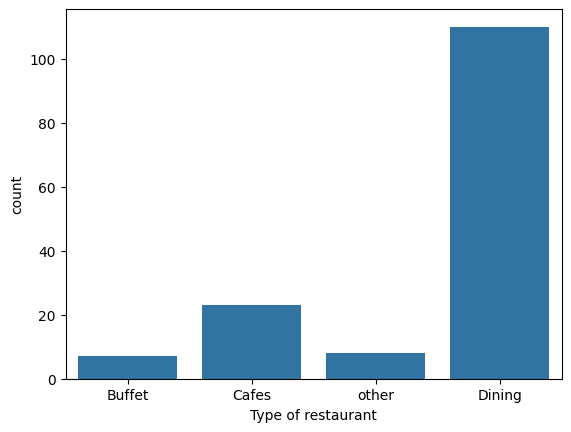

In [10]:
sns.countplot(x=dataframe['listed_in(type)'])
plt.xlabel("Type of restaurant")


Text(0, 0.5, 'Votes')

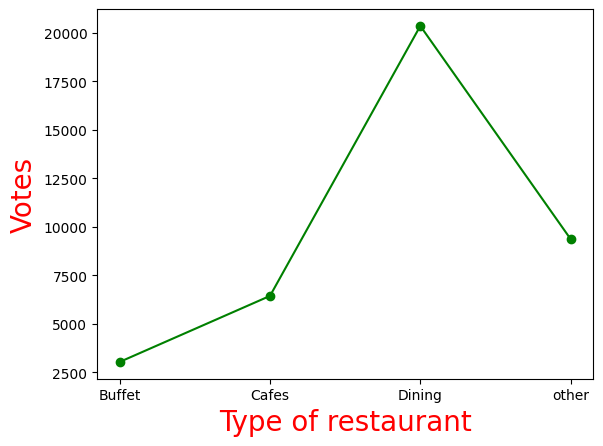

In [11]:
grouped_data = dataframe.groupby('listed_in(type)')['votes'].sum()
result = pd.DataFrame({'votes': grouped_data})
plt.plot(result, c='green', marker='o')
plt.xlabel('Type of restaurant', c='red', size=20)
plt.ylabel('Votes', c='red', size=20)


In [12]:
max_votes = dataframe['votes'].max()
restaurant_with_max_votes = dataframe.loc[dataframe['votes'] == max_votes, 'name']

print('Restaurant(s) with the maximum votes:')
print(restaurant_with_max_votes)


Restaurant(s) with the maximum votes:
38    Empire Restaurant
Name: name, dtype: object


<Axes: xlabel='online_order', ylabel='count'>

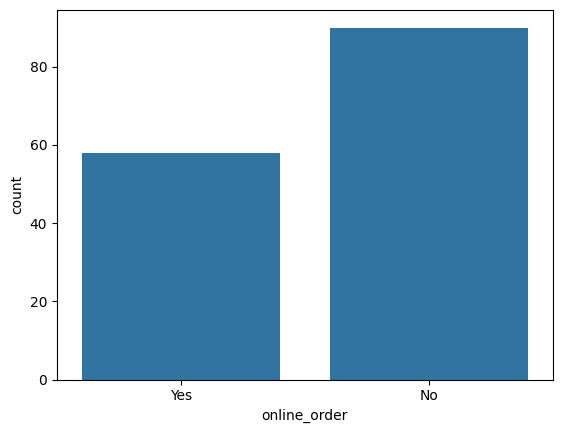

In [13]:
sns.countplot(x=dataframe['online_order'])


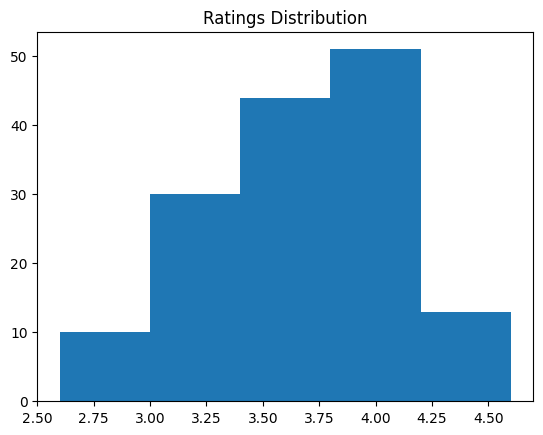

In [14]:
plt.hist(dataframe['rate'],bins=5)
plt.title('Ratings Distribution')
plt.show()


<Axes: xlabel='approx_cost(for two people)', ylabel='count'>

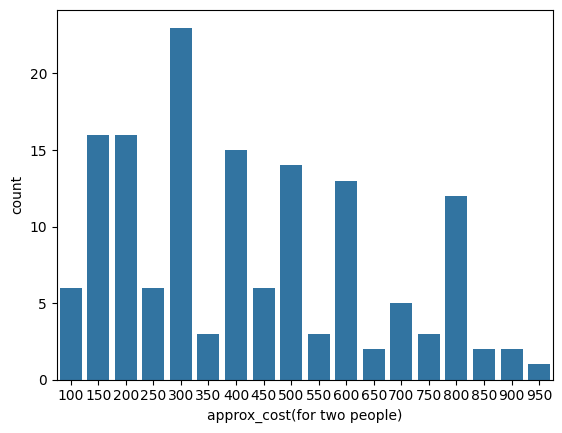

In [15]:
couple_data=dataframe['approx_cost(for two people)']
sns.countplot(x=couple_data)


<Axes: xlabel='online_order', ylabel='rate'>

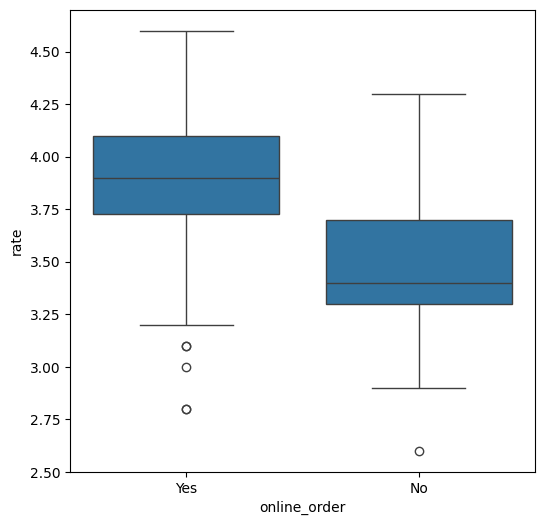

In [16]:
plt.figure(figsize = (6,6))
sns.boxplot(x = 'online_order', y = 'rate', data = dataframe)


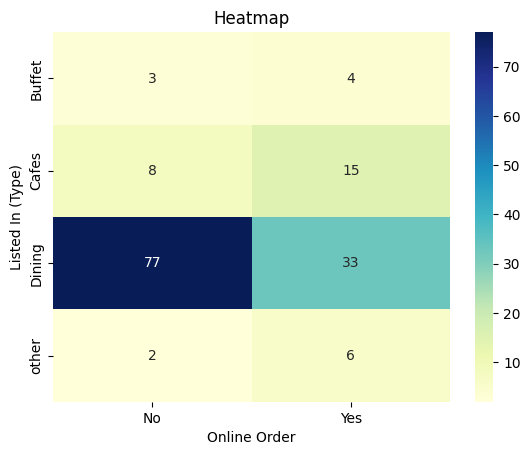

In [17]:
pivot_table = dataframe.pivot_table(index='listed_in(type)', columns='online_order', aggfunc='size', fill_value=0)
sns.heatmap(pivot_table, annot=True, cmap='YlGnBu', fmt='d')
plt.title('Heatmap')
plt.xlabel('Online Order')
plt.ylabel('Listed In (Type)')
plt.show()
#cONCLUSION: Dining restaurants primarily accept offline orders, whereas cafes primarily receive online orders. This suggests that clients prefer to place orders in person at restaurants, but prefer online ordering at cafes.

In [18]:
dataframe.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         148 non-null    object 
 1   online_order                 148 non-null    object 
 2   book_table                   148 non-null    object 
 3   rate                         148 non-null    float64
 4   votes                        148 non-null    int64  
 5   approx_cost(for two people)  148 non-null    int64  
 6   listed_in(type)              148 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 8.2+ KB


In [19]:
dataframe.isnull().sum()

name                           0
online_order                   0
book_table                     0
rate                           0
votes                          0
approx_cost(for two people)    0
listed_in(type)                0
dtype: int64

In [20]:
dataframe.describe

<bound method NDFrame.describe of                       name online_order book_table  rate  votes  \
0                    Jalsa          Yes        Yes   4.1    775   
1           Spice Elephant          Yes         No   4.1    787   
2          San Churro Cafe          Yes         No   3.8    918   
3    Addhuri Udupi Bhojana           No         No   3.7     88   
4            Grand Village           No         No   3.8    166   
..                     ...          ...        ...   ...    ...   
143       Melting Melodies           No         No   3.3      0   
144        New Indraprasta           No         No   3.3      0   
145           Anna Kuteera          Yes         No   4.0    771   
146                 Darbar           No         No   3.0     98   
147          Vijayalakshmi          Yes         No   3.9     47   

     approx_cost(for two people) listed_in(type)  
0                            800          Buffet  
1                            800          Buffet  
2       

In [21]:
dataframe.shape

(148, 7)

In [22]:
dataframe

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet
...,...,...,...,...,...,...,...
143,Melting Melodies,No,No,3.3,0,100,Dining
144,New Indraprasta,No,No,3.3,0,150,Dining
145,Anna Kuteera,Yes,No,4.0,771,450,Dining
146,Darbar,No,No,3.0,98,800,Dining


In [23]:
dataframe["online_order"].unique()

array(['Yes', 'No'], dtype=object)

In [24]:
dataframe.loc[3,'name']

'Addhuri Udupi Bhojana'

In [25]:
dataframe.iloc[1,0]

'Spice Elephant'

In [26]:
 dataframe.select_dtypes(include=['object']).columns

Index(['name', 'online_order', 'book_table', 'listed_in(type)'], dtype='object')

In [27]:
 dataframe.select_dtypes(include=["integer"]).columns

Index(['votes', 'approx_cost(for two people)'], dtype='object')

In [28]:
 dataframe.select_dtypes(include=['bool']).columns

Index([], dtype='object')

In [29]:
dataframe['listed_in(type)'].unique()

array(['Buffet', 'Cafes', 'other', 'Dining'], dtype=object)

In [30]:
dataframe

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet
...,...,...,...,...,...,...,...
143,Melting Melodies,No,No,3.3,0,100,Dining
144,New Indraprasta,No,No,3.3,0,150,Dining
145,Anna Kuteera,Yes,No,4.0,771,450,Dining
146,Darbar,No,No,3.0,98,800,Dining


Axes(0.125,0.11;0.775x0.77)


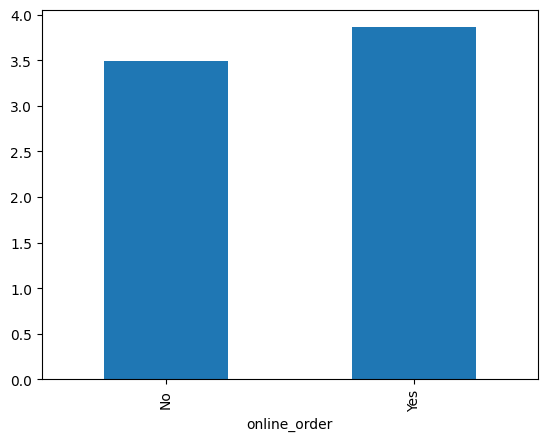

In [31]:
a=dataframe.groupby('online_order')['rate'].mean().plot(kind='bar')
print(a)

In [32]:
print(dataframe.dtypes)


name                            object
online_order                    object
book_table                      object
rate                           float64
votes                            int64
approx_cost(for two people)      int64
listed_in(type)                 object
dtype: object


In [33]:
#converting into numeric 
dataframe['rate'] = pd.to_numeric(dataframe['rate'], errors='coerce')


In [34]:
print(dataframe.dtypes)

name                            object
online_order                    object
book_table                      object
rate                           float64
votes                            int64
approx_cost(for two people)      int64
listed_in(type)                 object
dtype: object


In [35]:
grouped = dataframe.groupby('online_order')['rate'].sum()

grouped

online_order
No     313.9
Yes    223.8
Name: rate, dtype: float64

In [36]:
dataframe.isnull().sum()

name                           0
online_order                   0
book_table                     0
rate                           0
votes                          0
approx_cost(for two people)    0
listed_in(type)                0
dtype: int64

In [37]:
# First, check unique values to see what's wrong
print(dataframe['rate'].unique())


[4.1 3.8 3.7 3.6 4.6 4.  4.2 3.9 3.1 3.  3.2 3.3 2.8 4.4 4.3 2.9 3.5 2.6
 3.4]


In [38]:
dataframe.groupby('online_order')['rate'].sum()


online_order
No     313.9
Yes    223.8
Name: rate, dtype: float64

In [39]:
import numpy as np

# Create a random array of ratings
random_ratings = np.round(np.random.uniform(3.0, 5.0, dataframe['rate'].isna().sum()), 1)

# Assign these random ratings **only** to the NaN positions
dataframe.loc[dataframe['rate'].isna(), 'rate'] = random_ratings

#no fillna() is use in this instead it use loc


In [40]:
dataframe[['rate']]

,rate
0,4.1
1,4.1
2,3.8
3,3.7
4,3.8
...,...
143,3.3
144,3.3
145,4.0
146,3.0


In [41]:
dataframe.groupby('online_order')['rate'].count()

online_order
No     90
Yes    58
Name: rate, dtype: int64

In [42]:
dataframe.groupby('online_order')['rate'].mean()

online_order
No     3.487778
Yes    3.858621
Name: rate, dtype: float64

In [43]:
dataframe.groupby('online_order')['rate'].sum()

online_order
No     313.9
Yes    223.8
Name: rate, dtype: float64

<Axes: title={'center': 'Average Rating by Online Order'}, xlabel='online_order'>

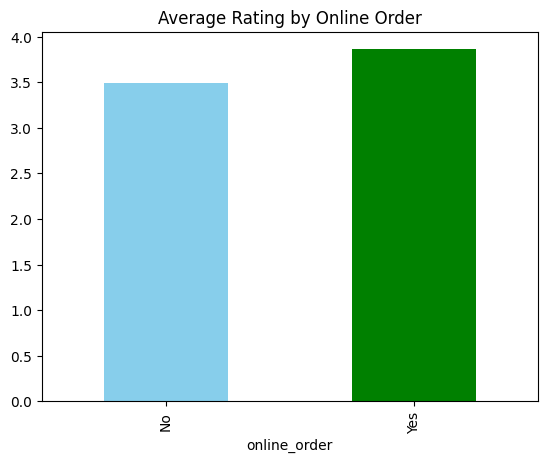

In [44]:
dataframe.groupby('online_order')['rate'].mean().plot(kind='bar', title='Average Rating by Online Order', color=['skyblue', 'green'])


In [45]:
import random

user_types = ['Food Critic', 'Regular User', 'Chef', 'Local Guide', 'Tourist']
dataframe['rated_by'] = [random.choice(user_types) for _ in range(len(dataframe))]


In [46]:
dataframe['rated_by'].unique()

array(['Local Guide', 'Regular User', 'Chef', 'Tourist', 'Food Critic'],
      dtype=object)

<Axes: title={'center': 'Average Rating by User Type'}, ylabel='rate'>

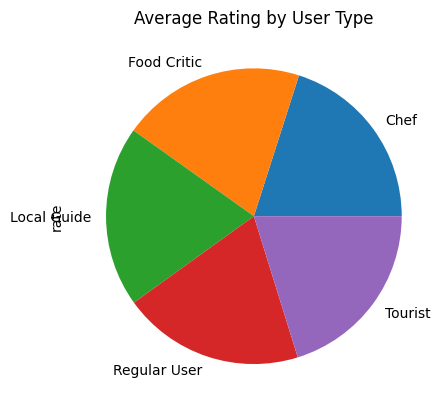

In [47]:
dataframe.groupby('rated_by')['rate'].mean().plot(kind='pie', title='Average Rating by User Type', color=['skyblue', 'green','orange','pink','red'])


<Axes: title={'center': 'Average Rating by User Type'}, ylabel='rated_by'>

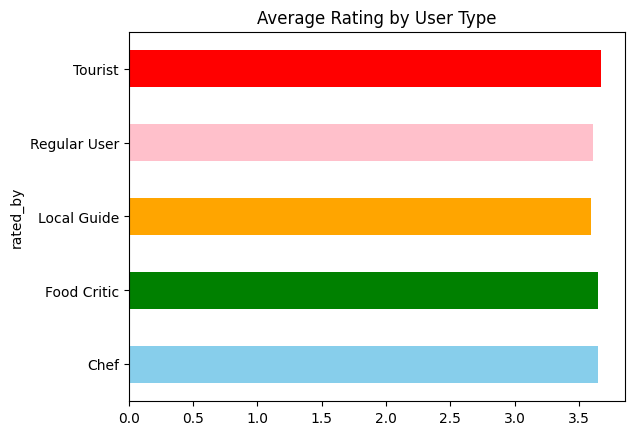

In [48]:
dataframe.groupby('rated_by')['rate'].mean().plot(kind='barh', title='Average Rating by User Type', color=['skyblue', 'green','orange','pink','red'])


In [49]:
dataframe.groupby('rated_by')['rate'].max()

rated_by
Chef            4.4
Food Critic     4.4
Local Guide     4.6
Regular User    4.2
Tourist         4.6
Name: rate, dtype: float64

<Axes: title={'center': 'Average Rating by Person'}, ylabel='name'>

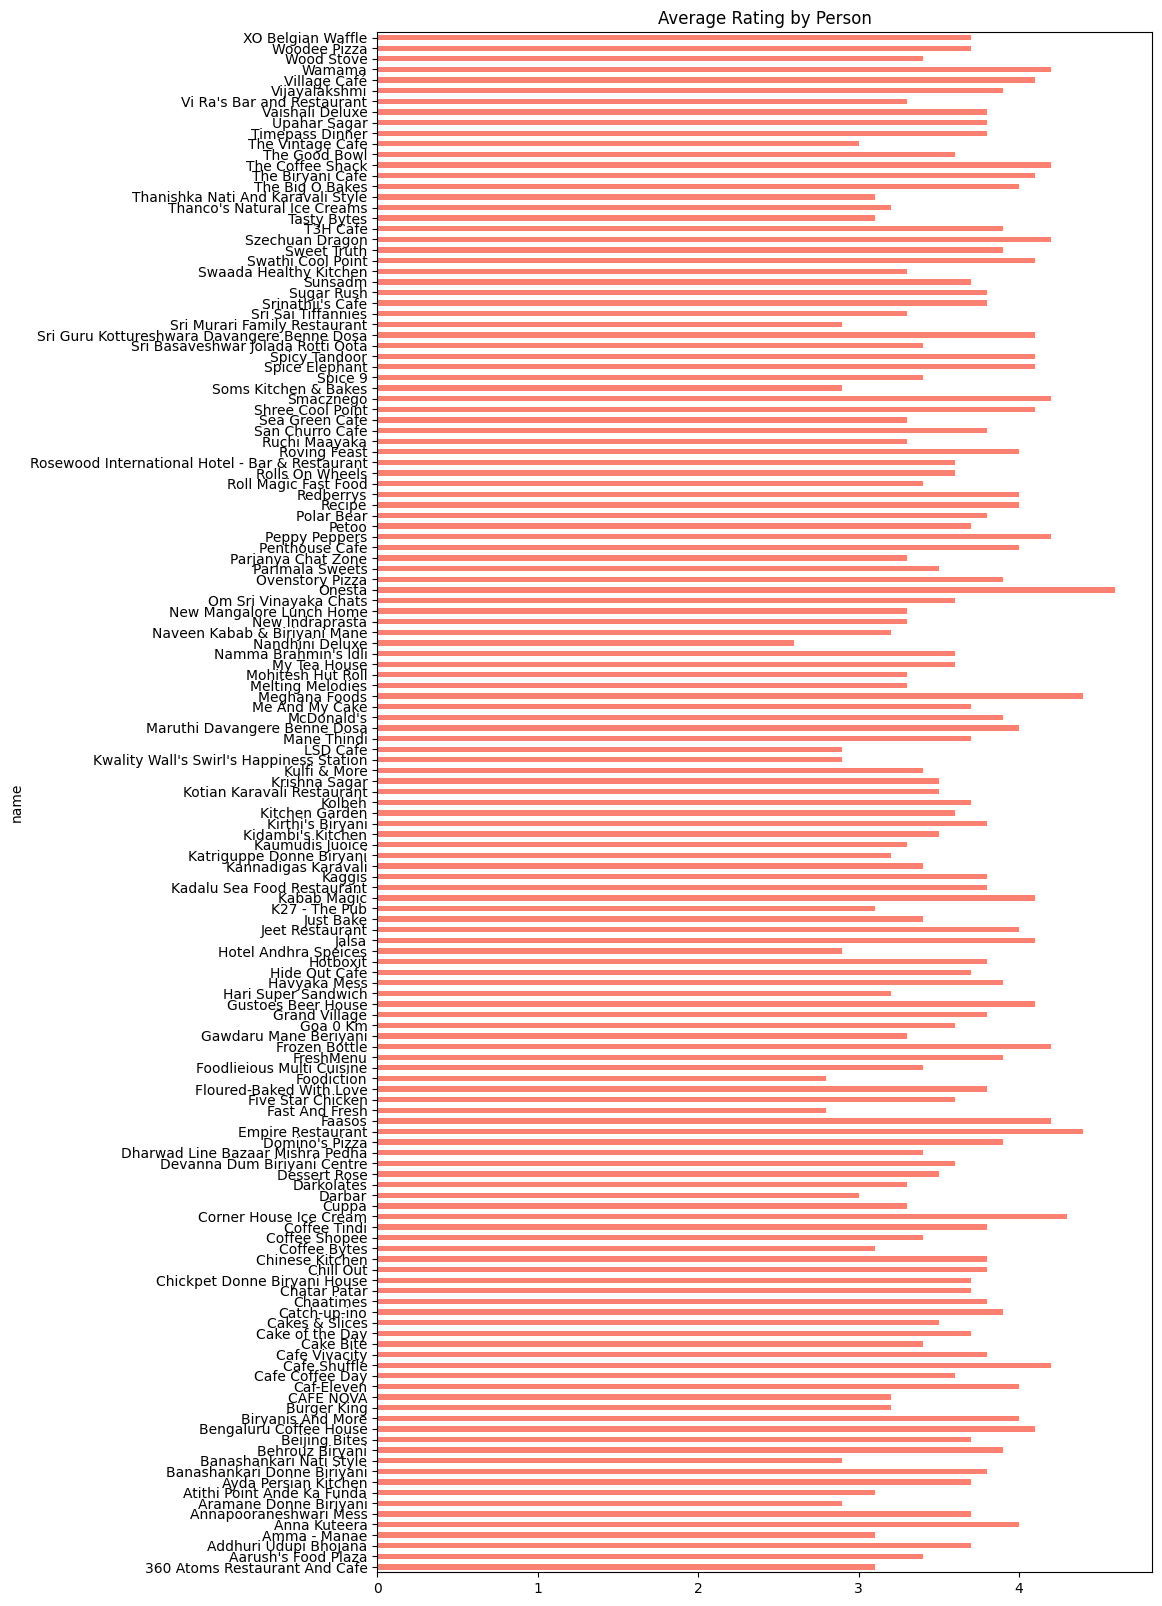

In [50]:
dataframe.groupby('name')['rate'].mean().plot(kind='barh', title='Average Rating by Person', figsize=(10, 20), color='salmon')


In [51]:
dataframe['name']

0                      Jalsa
1             Spice Elephant
2            San Churro Cafe
3      Addhuri Udupi Bhojana
4              Grand Village
               ...          
143         Melting Melodies
144          New Indraprasta
145             Anna Kuteera
146                   Darbar
147            Vijayalakshmi
Name: name, Length: 148, dtype: object

In [52]:
import pandas as pd
import numpy as np
import bar_chart_race as bcr

# Sample: assume you already have 'rated_by' and 'rate' columns
# Create a fake time column for animation (just 1 time snapshot is fine for demo)
dataframe['time'] = '2025'  # Or you could use a sequence if you're doing changes over time

# Pivot the data: rows = time, columns = names, values = ratings
df_pivot = dataframe.pivot_table(index='time', columns='rated_by', values='rate', aggfunc='mean')

# bar_chart_race needs time to be a time-like index
df_pivot.index = pd.to_datetime(df_pivot.index)


ModuleNotFoundError: No module named 'bar_chart_race'

In [ ]:
bcr.bar_chart_race(
    df=df_pivot,
    filename='ratings_race.gif',
    orientation='h',
    sort='desc',
    n_bars=10,  # Show top 10 names
    fixed_order=False,
    fixed_max=True,
    steps_per_period=20,
    period_length=1000,
    figsize=(10, 6),
    cmap='Set3',
    title='Top Rated Individuals',
    bar_size=0.95,
    period_label={'x': .99, 'y': .25, 'ha': 'right', 'va': 'center'}
)


In [ ]:
#outlier handling 

print("Before:\n", dataframe['rate'].describe())

In [ ]:
dataframe['rated_by'].describe()

In [ ]:
dataframe[['rated_by']].value_counts().isna()


In [ ]:
dataframe['rated_by'].min()

In [ ]:
dataframe['rated_by'].max()

In [ ]:
dataframe.isna().sum()

In [ ]:
dataframe.select_dtypes(include=['integer']).columns

In [ ]:
print(dataframe.dtypes)

In [ ]:
q1=dataframe['rate'].quantile(0.25)
q3=dataframe['rate'].quantile(0.75)
print(q1)
print(q3)
iqr=q3-q1
print(iqr)

# Define bounds
lower = q1 - 1.5 * iqr
upper = q3+ 1.5 * iqr

# remove outlier
outliers = dataframe[(dataframe['rate'] >= lower) | (dataframe['rate'] <= upper)]
print(outliers)

In [ ]:
dataframe.isna().sum().sum()

In [ ]:
# Find outliers
outliers = dataframe[(dataframe['rate'] < lower) | (dataframe['rate'] > upper)]
print(outliers)

In [ ]:
print("After:\n", dataframe['rate'].describe())

In [57]:
dataframe.describe(include="all")

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type),rated_by
count,148,148,148,148.000000,148.000000,148.000000,148,148
unique,145,2,2,NaN,NaN,NaN,4,5
top,San Churro Cafe,No,No,NaN,NaN,NaN,Dining,Regular User
freq,2,90,140,NaN,NaN,NaN,110,34
mean,NaN,NaN,NaN,3.633108,264.810811,418.243243,NaN,NaN
std,NaN,NaN,NaN,0.402271,653.676951,223.085098,NaN,NaN
min,NaN,NaN,NaN,2.600000,0.000000,100.000000,NaN,NaN
25%,NaN,NaN,NaN,3.300000,6.750000,200.000000,NaN,NaN
50%,NaN,NaN,NaN,3.700000,43.500000,400.000000,NaN,NaN
75%,NaN,NaN,NaN,3.900000,221.750000,600.000000,NaN,NaN


In [56]:
dataframe.describe()

,rate,votes,approx_cost(for two people)
count,148.000000,148.000000,148.000000
mean,3.633108,264.810811,418.243243
std,0.402271,653.676951,223.085098
min,2.600000,0.000000,100.000000
25%,3.300000,6.750000,200.000000
50%,3.700000,43.500000,400.000000
75%,3.900000,221.750000,600.000000
max,4.600000,4884.000000,950.000000


In [55]:
dataframe['rate'].value_counts()

rate
3.8    20
3.7    15
3.3    14
3.4    12
4.1    11
3.6    11
4.0    10
3.9    10
4.2     8
3.1     7
3.2     7
2.9     7
3.5     6
4.6     2
2.8     2
4.4     2
3.0     2
4.3     1
2.6     1
Name: count, dtype: int64

In [54]:
dataframe['rate'].unique()

array([4.1, 3.8, 3.7, 3.6, 4.6, 4. , 4.2, 3.9, 3.1, 3. , 3.2, 3.3, 2.8,
       4.4, 4.3, 2.9, 3.5, 2.6, 3.4])

In [ ]:
#encoding classification 
#Encoding is the process of converting categorical (non-numeric) data into numbers — so that machine learning models can understand and work with it.

#Alternate code==(dataframe['book_table_encoded'] = dataframe['book_table'].map({'Yes': 1, 'No': 0}))

#types= 1.label encoder, 2.one hot, 3.ordinalencoder


In [53]:
#label encoder 

dataframe['book_table'].value_counts()


book_table
No     140
Yes      8
Name: count, dtype: int64

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
dataframe['book_table_encoded'] = le.fit_transform(dataframe['book_table'])


In [59]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
dataframe['book_table_l_coder']=le.fit_transform(dataframe['book_table'])

In [62]:
dataframe[['book_table_l_coder']].value_counts()

book_table_l_coder
0                     140
1                       8
Name: count, dtype: int64

In [116]:
dataframe

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type),rated_by,book_table_l_coder
0,Jalsa,Yes,Yes,4.1,775.0,800.0,Buffet,Local Guide,1.0
1,Spice Elephant,Yes,No,4.1,787.0,800.0,Buffet,Regular User,0.0
2,San Churro Cafe,Yes,No,3.8,918.0,800.0,Buffet,Chef,0.0
3,Addhuri Udupi Bhojana,No,No,3.7,88.0,300.0,Buffet,Tourist,0.0
4,Grand Village,No,No,3.8,166.0,600.0,Buffet,Tourist,0.0
...,...,...,...,...,...,...,...,...,...
143,Melting Melodies,No,No,3.3,0.0,100.0,Dining,Local Guide,0.0
144,New Indraprasta,No,No,3.3,0.0,150.0,Dining,Local Guide,0.0
145,Anna Kuteera,Yes,No,4.0,771.0,450.0,Dining,Tourist,0.0
146,Darbar,No,No,3.0,98.0,800.0,Dining,Tourist,0.0


In [117]:
dataframe['listed_in(type)'].value_counts()

listed_in(type)
Dining    110
Cafes      23
other       8
Buffet      7
Name: count, dtype: int64

In [72]:
#one hot encoder 
data=dataframe[['listed_in(type)']]
endcoding=pd.get_dummies(data)
print(endcoding)
print("---------------------")



     listed_in(type)_Buffet  listed_in(type)_Cafes  listed_in(type)_Dining  \
0                      True                  False                   False   
1                      True                  False                   False   
2                      True                  False                   False   
3                      True                  False                   False   
4                      True                  False                   False   
..                      ...                    ...                     ...   
143                   False                  False                    True   
144                   False                  False                    True   
145                   False                  False                    True   
146                   False                  False                    True   
147                   False                  False                    True   

     listed_in(type)_other  
0                    False  
1    

In [77]:
#one hot encoding 

from sklearn.preprocessing import OneHotEncoder

ohe=OneHotEncoder()
arr=ohe.fit_transform(data).toarray()

In [79]:
encoded_df = pd.DataFrame(arr, columns=ohe.get_feature_names_out(["listed_in(type)"]))
print("\nEncoded DataFrame using OneHotEncoder:")
print(encoded_df)



Encoded DataFrame using OneHotEncoder:
     listed_in(type)_Buffet  listed_in(type)_Cafes  listed_in(type)_Dining  \
0                       1.0                    0.0                     0.0   
1                       1.0                    0.0                     0.0   
2                       1.0                    0.0                     0.0   
3                       1.0                    0.0                     0.0   
4                       1.0                    0.0                     0.0   
..                      ...                    ...                     ...   
143                     0.0                    0.0                     1.0   
144                     0.0                    0.0                     1.0   
145                     0.0                    0.0                     1.0   
146                     0.0                    0.0                     1.0   
147                     0.0                    0.0                     1.0   

     listed_in(type)_ot

In [80]:
encoded_df

,listed_in(type)_Buffet,listed_in(type)_Cafes,listed_in(type)_Dining,listed_in(type)_other
0,1.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0
...,...,...,...,...
143,0.0,0.0,1.0,0.0
144,0.0,0.0,1.0,0.0
145,0.0,0.0,1.0,0.0
146,0.0,0.0,1.0,0.0


In [83]:
dataframe=pd.concat([dataframe, encoded_df], ignore_index=True)
dataframe

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type),rated_by,book_table_l_coder,listed_in(type)_Buffet,listed_in(type)_Cafes,listed_in(type)_Dining,listed_in(type)_other
0,Jalsa,Yes,Yes,4.1,775.0,800.0,Buffet,Local Guide,1.0,NaN,NaN,NaN,NaN
1,Spice Elephant,Yes,No,4.1,787.0,800.0,Buffet,Regular User,0.0,NaN,NaN,NaN,NaN
2,San Churro Cafe,Yes,No,3.8,918.0,800.0,Buffet,Chef,0.0,NaN,NaN,NaN,NaN
3,Addhuri Udupi Bhojana,No,No,3.7,88.0,300.0,Buffet,Tourist,0.0,NaN,NaN,NaN,NaN
4,Grand Village,No,No,3.8,166.0,600.0,Buffet,Tourist,0.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
439,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,1.0,0.0
440,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,1.0,0.0
441,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,1.0,0.0
442,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,1.0,0.0


In [86]:
dataframe.isna().sum()

name                           296
online_order                   296
book_table                     296
rate                           296
votes                          296
approx_cost(for two people)    296
listed_in(type)                296
rated_by                       296
book_table_l_coder             296
listed_in(type)_Buffet         148
listed_in(type)_Cafes          148
listed_in(type)_Dining         148
listed_in(type)_other          148
dtype: int64

In [88]:
# Fix: Merge columns side-by-side (not stack rows)
dataframe = pd.concat([dataframe.drop('listed_in(type)_Buffet', axis=1), encoded_df], axis=1)


In [91]:
# Fix: Merge columns side-by-side (not stack rows)
dataframe = pd.concat([dataframe.drop('listed_in(type)_Cafes', axis=1), encoded_df], axis=1)
# Fix: Merge columns side-by-side (not stack rows)
dataframe = pd.concat([dataframe.drop('listed_in(type)_Dining', axis=1), encoded_df], axis=1)
# Fix: Merge columns side-by-side (not stack rows)
dataframe = pd.concat([dataframe.drop('listed_in(type)_other', axis=1), encoded_df], axis=1)
# Fix: Merge columns side-by-side (not stack rows)
dataframe = pd.concat([dataframe.drop('listed_in(type)_Buffet', axis=1), encoded_df], axis=1)
# Fix: Merge columns side-by-side (not stack rows)
dataframe = pd.concat([dataframe.drop('listed_in(type)_Cafes', axis=1), encoded_df], axis=1)
# Fix: Merge columns side-by-side (not stack rows)
dataframe = pd.concat([dataframe.drop('listed_in(type)_other', axis=1), encoded_df], axis=1)






In [93]:
dataframe.isna().sum()

name                           296
online_order                   296
book_table                     296
rate                           296
votes                          296
approx_cost(for two people)    296
listed_in(type)                296
rated_by                       296
book_table_l_coder             296
listed_in(type)_Dining         296
listed_in(type)_Dining         296
listed_in(type)_Buffet         296
listed_in(type)_Dining         296
listed_in(type)_Buffet         296
listed_in(type)_Cafes          296
listed_in(type)_Dining         296
listed_in(type)_Buffet         296
listed_in(type)_Cafes          296
listed_in(type)_Dining         296
listed_in(type)_other          296
dtype: int64

In [94]:
dataframe = dataframe.iloc[:148].reset_index(drop=True)


In [98]:
dataframe.isna().sum()

name                           0
online_order                   0
book_table                     0
rate                           0
votes                          0
approx_cost(for two people)    0
listed_in(type)                0
rated_by                       0
book_table_l_coder             0
listed_in(type)_Dining         0
listed_in(type)_Dining         0
listed_in(type)_Buffet         0
listed_in(type)_Dining         0
listed_in(type)_Buffet         0
listed_in(type)_Cafes          0
listed_in(type)_Dining         0
listed_in(type)_Buffet         0
listed_in(type)_Cafes          0
listed_in(type)_Dining         0
listed_in(type)_other          0
dtype: int64

In [99]:
dataframe_backup = dataframe.copy()


In [100]:
dataframe = pd.concat([dataframe, encoded_df.reset_index(drop=True)], axis=1)


In [104]:
del encoded_df


In [110]:
print(dataframe.columns[-8:])  # Show the last 8 columns


Index(['listed_in(type)_Buffet', 'listed_in(type)_Cafes',
       'listed_in(type)_Dining', 'listed_in(type)_other',
       'listed_in(type)_Buffet', 'listed_in(type)_Cafes',
       'listed_in(type)_Dining', 'listed_in(type)_other'],
      dtype='object')


In [112]:
dataframe.drop(columns=[
    'listed_in(type)_Buffet',
    'listed_in(type)_Cafes',
    'listed_in(type)_Dining',
    'listed_in(type)_other'
], inplace=True)


In [113]:
dataframe

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type),rated_by,book_table_l_coder
0,Jalsa,Yes,Yes,4.1,775.0,800.0,Buffet,Local Guide,1.0
1,Spice Elephant,Yes,No,4.1,787.0,800.0,Buffet,Regular User,0.0
2,San Churro Cafe,Yes,No,3.8,918.0,800.0,Buffet,Chef,0.0
3,Addhuri Udupi Bhojana,No,No,3.7,88.0,300.0,Buffet,Tourist,0.0
4,Grand Village,No,No,3.8,166.0,600.0,Buffet,Tourist,0.0
...,...,...,...,...,...,...,...,...,...
143,Melting Melodies,No,No,3.3,0.0,100.0,Dining,Local Guide,0.0
144,New Indraprasta,No,No,3.3,0.0,150.0,Dining,Local Guide,0.0
145,Anna Kuteera,Yes,No,4.0,771.0,450.0,Dining,Tourist,0.0
146,Darbar,No,No,3.0,98.0,800.0,Dining,Tourist,0.0


In [114]:
[col for col in dataframe.columns if 'listed_in(type)' in col]


['listed_in(type)']

In [119]:
dataframe['order_online_encoder']=le.fit_transform(dataframe['online_order'])
dataframe

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type),rated_by,book_table_l_coder,order_online_encoder
0,Jalsa,Yes,Yes,4.1,775.0,800.0,Buffet,Local Guide,1.0,1
1,Spice Elephant,Yes,No,4.1,787.0,800.0,Buffet,Regular User,0.0,1
2,San Churro Cafe,Yes,No,3.8,918.0,800.0,Buffet,Chef,0.0,1
3,Addhuri Udupi Bhojana,No,No,3.7,88.0,300.0,Buffet,Tourist,0.0,0
4,Grand Village,No,No,3.8,166.0,600.0,Buffet,Tourist,0.0,0
...,...,...,...,...,...,...,...,...,...,...
143,Melting Melodies,No,No,3.3,0.0,100.0,Dining,Local Guide,0.0,0
144,New Indraprasta,No,No,3.3,0.0,150.0,Dining,Local Guide,0.0,0
145,Anna Kuteera,Yes,No,4.0,771.0,450.0,Dining,Tourist,0.0,1
146,Darbar,No,No,3.0,98.0,800.0,Dining,Tourist,0.0,0


#model building 

Predict if a customer will book a table (book_table)

Predict if online ordering will be selected (online_order)

Predict rating category (rate classified into low/medium/high)

In [121]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# X = your features (make sure encoded)
X = dataframe[['rate', 'votes', 'order_online_encoder']]
y = dataframe['book_table_l_coder']  # Target

# Split into train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Predict and evaluate
predictions = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, predictions))


Accuracy: 0.9333333333333333


In [128]:
#logistic regresssion (unsupervised learning)

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix

# Assuming you've encoded book_table into 0/1 and selected features
X = dataframe[['rate', 'votes', 'order_online_encoder']]
y = dataframe['book_table_l_coder']  # 0 = No, 1 = Yes

#split into train / test 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#train the model
model = LogisticRegression()
model.fit(X_train, y_train)

#predict and evaluate
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, pred))


Accuracy: 0.9333333333333333


In [129]:
model.predict_proba(X_test[:5])  # See how confident it is


array([[0.99018757, 0.00981243],
       [0.92107404, 0.07892596],
       [0.99018757, 0.00981243],
       [0.97535979, 0.02464021],
       [0.98587035, 0.01412965]])

In [130]:
# Confusion Matrix to see true vs. predicted
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Confusion Matrix:
 [[28  0]
 [ 2  0]]


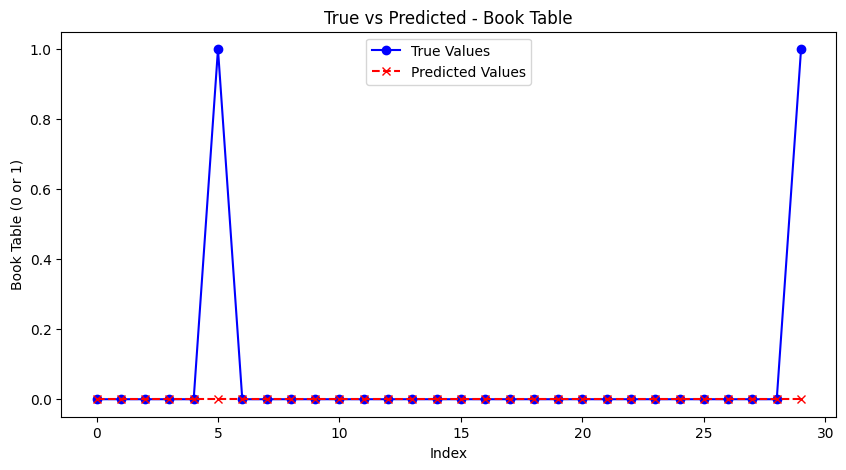

In [131]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(y_test.values, label="True Values", marker='o', linestyle='-', color='blue')
plt.plot(y_pred, label="Predicted Values", marker='x', linestyle='--', color='red')
plt.title('True vs Predicted - Book Table')
plt.xlabel('Index')
plt.ylabel('Book Table (0 or 1)')
plt.legend()
plt.show()


Accuracy: 0.9333333333333333
Confusion Matrix:
 [[28  0]
 [ 2  0]]


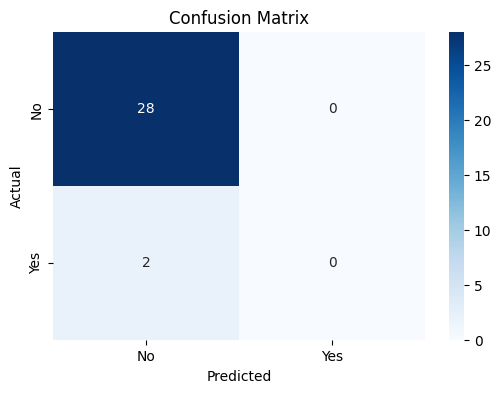

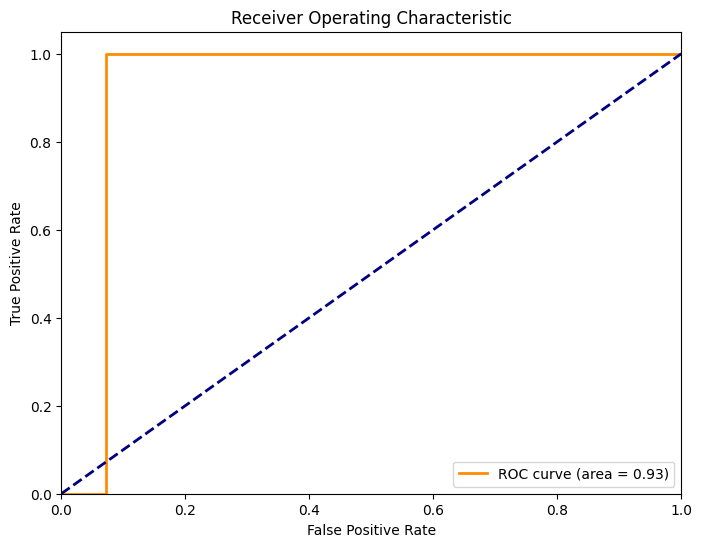

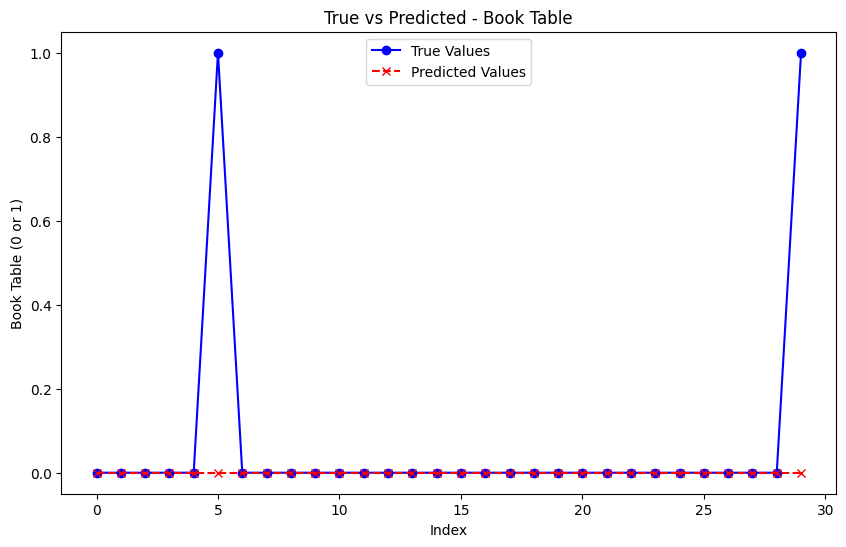

In [132]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc

# Prepare data
X = dataframe[['rate', 'votes', 'order_online_encoder']]
y = dataframe['book_table_l_coder']

# Split into train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))
# Confusion Matrix to see true vs. predicted
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

# True vs Predicted
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label="True Values", marker='o', linestyle='-', color='blue')
plt.plot(y_pred, label="Predicted Values", marker='x', linestyle='--', color='red')
plt.title('True vs Predicted - Book Table')
plt.xlabel('Index')
plt.ylabel('Book Table (0 or 1)')
plt.legend()
plt.show()


In [135]:
import dash
from dash import dcc, html
import plotly.express as px
import pandas as pd

# Create a Dash app
app = dash.Dash(__name__)

# 1. Average Ratings (Bar chart)
avg_rating = dataframe.groupby('name')['rate'].mean().reset_index()
avg_rating_fig = px.bar(avg_rating, x='name', y='rate', title='Average Ratings by Restaurant')

# 2. Most Common Restaurant Types (Pie chart)
restaurant_types = dataframe['listed_in(type)'].value_counts().reset_index()
restaurant_types.columns = ['type', 'count']
restaurant_types_fig = px.pie(restaurant_types, names='type', values='count', title='Most Common Restaurant Types')

# 2️⃣ **App Layout** - Organize everything into sections
app.layout = html.Div(children=[
    html.H1(children='Restaurant Dashboard'),

    # Section 1: Average Ratings
    html.Div([
        dcc.Graph(
            id='average-ratings',
            figure=avg_rating_fig
        )
    ]),

    # Section 2: Most Common Restaurant Types
    html.Div([
        dcc.Graph(
            id='restaurant-types',
            figure=restaurant_types_fig
        )
    ])
])

# Run the app
if __name__ == '__main__':
    app.run_server(debug=True)


In [136]:
dataframe.groupby('name')['rate'].mean().reset_index()

,name,rate
0,360 Atoms Restaurant And Cafe,3.1
1,Aarush's Food Plaza,3.4
2,Addhuri Udupi Bhojana,3.7
3,Amma - Manae,3.1
4,Anna Kuteera,4.0
...,...,...
140,Village Café,4.1
141,Wamama,4.2
142,Wood Stove,3.4
143,Woodee Pizza,3.7
